des_facet
Television                               3
International Relations                  3
United States Politics and Government    3
Israel-Gaza War (2023- )                 3
Ships and Shipping                       3
                                        ..
Historic Buildings and Sites             1
Churches (Buildings)                     1
Boats and Boating                        1
Animal Behavior                          1
The Planets (Musical Work)               1
Name: count, Length: 92, dtype: int64


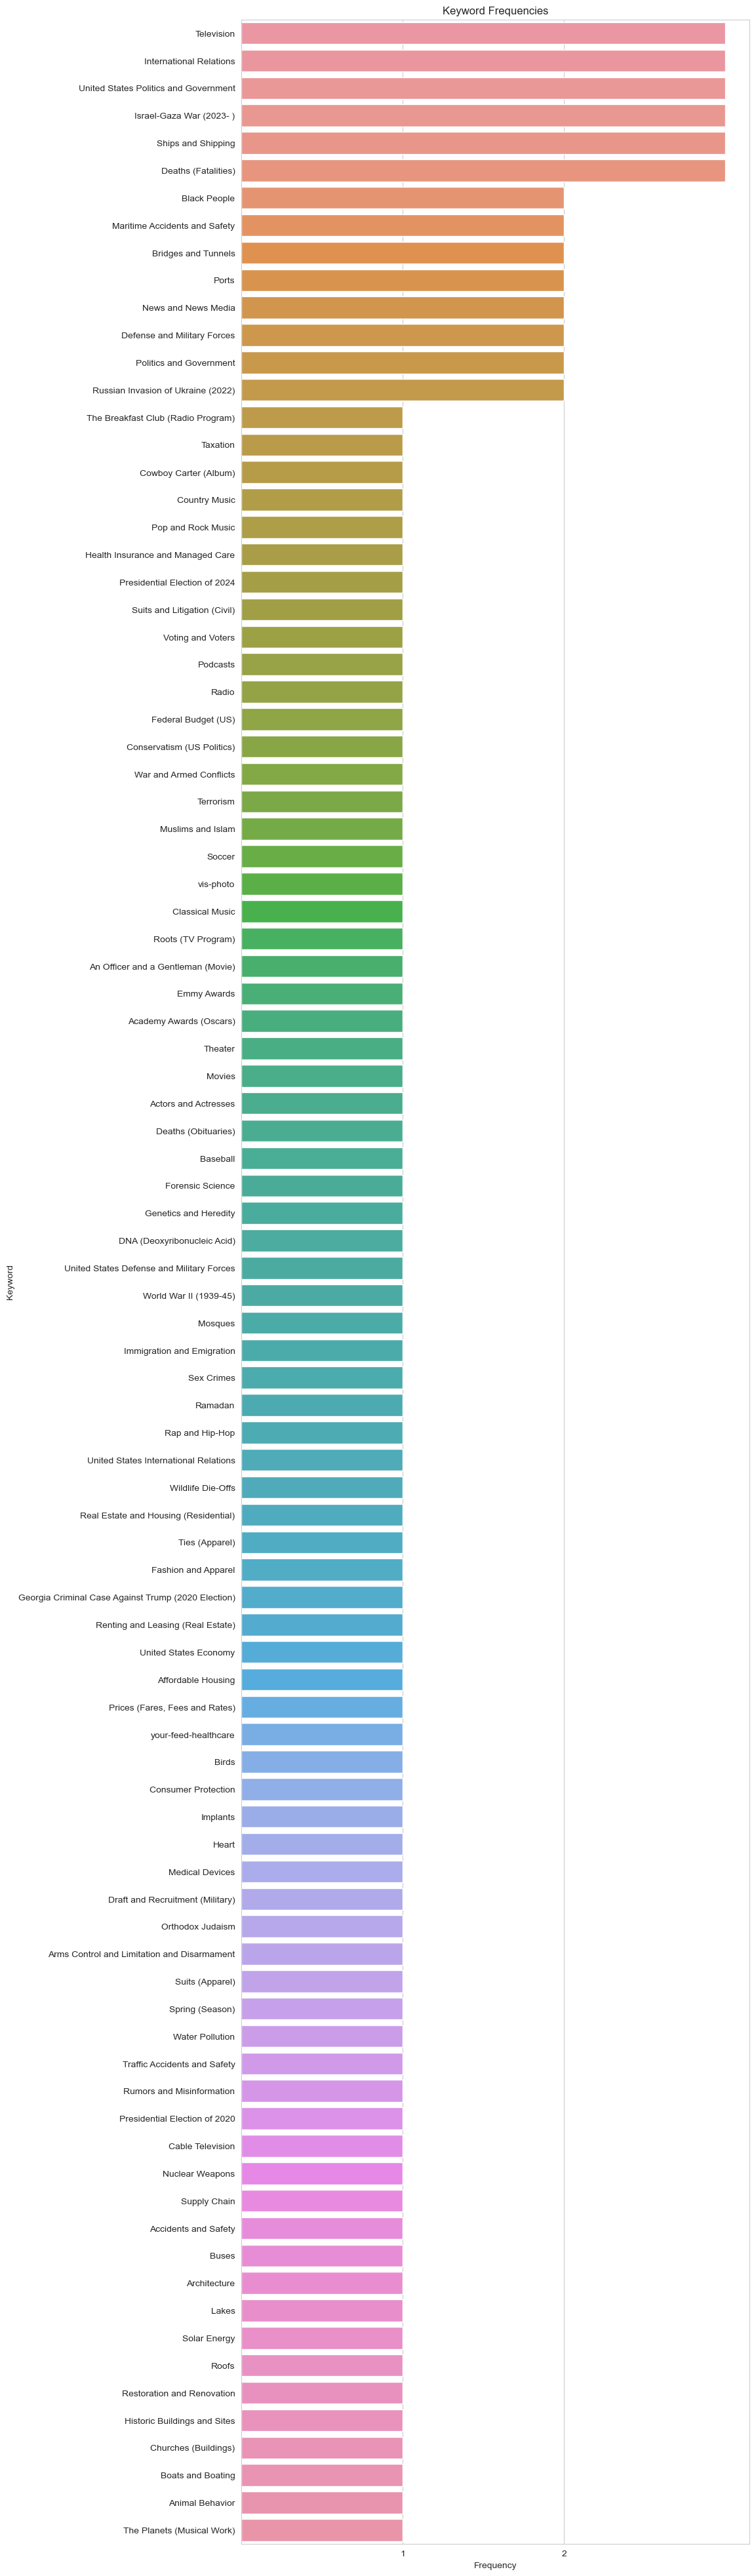

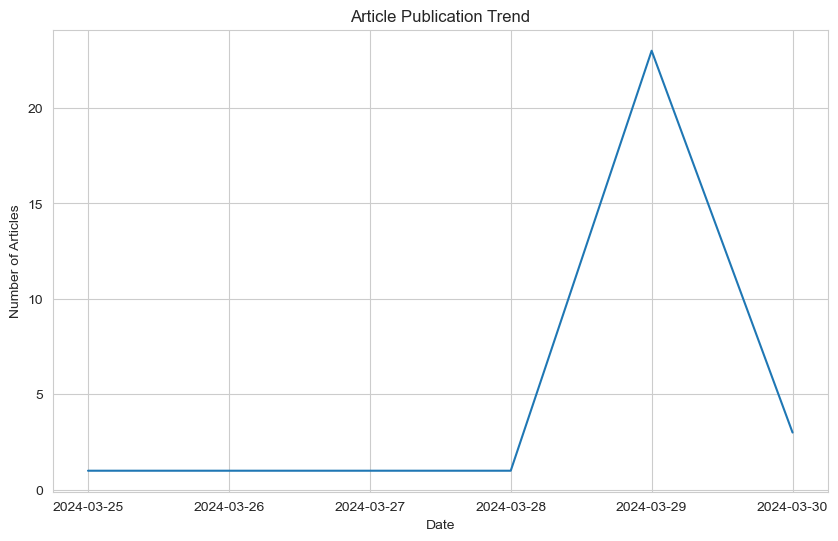

In [2]:
import requests as r
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

# API Call
top_stories = r.get(f"https://api.nytimes.com/svc/topstories/v2/home.json?api-key=exNnF4I8nhzvGTTI5hXz8GUtAyAbBqUe").content.decode()

# Read JSON data
nyt_home = pd.read_json(StringIO(top_stories))
results = pd.json_normalize(nyt_home['results'])

# Parse keywords
keywords = results['des_facet'].explode()
keywords = keywords.value_counts()
print(keywords)

keywords = keywords.reset_index()

# Create keyword frequencies chart
sns.set_style("whitegrid")
plt.figure(figsize=(10, 50))
plt.xticks(range(min(keywords['count']), max(keywords['count'])))
sns.barplot(x='count', y='des_facet', data=keywords, errorbar=None)
plt.title('Keyword Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

# Extract and process publication dates
articles = pd.DataFrame(results)
articles['published_date'] = pd.to_datetime(articles['published_date']).dt.date

# Plot article publication trend
plt.figure(figsize=(10, 6))
articles.groupby('published_date').size().plot()
plt.title('Article Publication Trend')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()